In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('dataset_task2.csv')
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [107]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df.drop(columns=['CustomerID'],axis=1)

In [111]:
df.head(15)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [112]:
df['Age'].skew()

np.float64(0.48556885096681657)

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

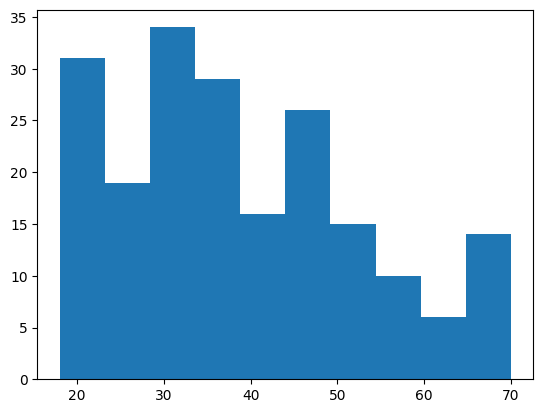

In [113]:
plt.hist(df['Age'])

In [114]:
df['Annual Income (k$)'].skew()

np.float64(0.3218425498619055)

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

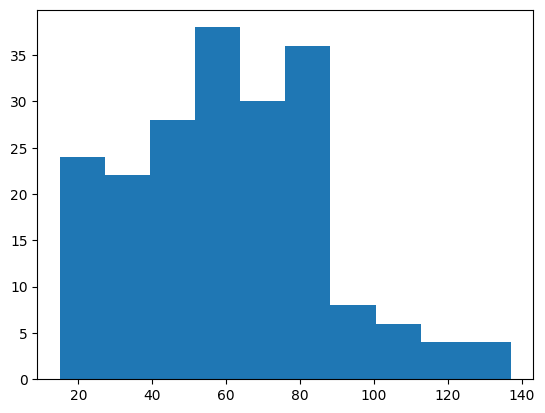

In [115]:
plt.hist(df['Annual Income (k$)'])

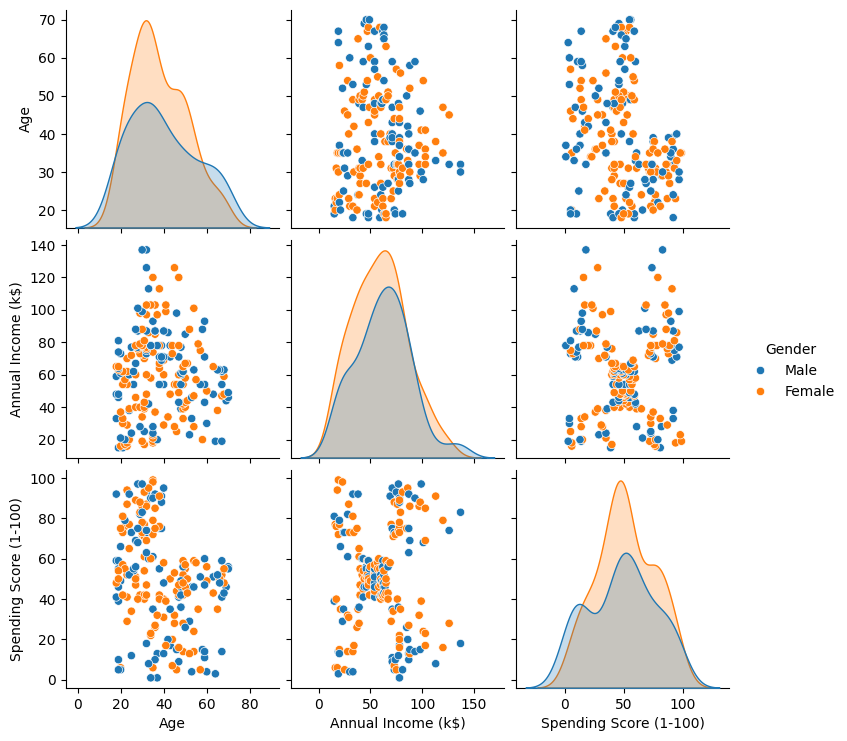

In [116]:
sns.pairplot(data=df,hue='Gender')

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
ohe_transformer = OneHotEncoder(handle_unknown="ignore")
binary_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('binary',binary_transformer, ['Gender']),
        ('scaler',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)'])
        
    ],
    remainder='passthrough'
)

In [118]:
preproc = preprocessor.fit(df)
df1_transformed = pd.DataFrame(
    preproc.transform(df),
    columns=preproc.get_feature_names_out()
)

In [119]:
df1_transformed.head(15)

,binary__Gender_Female,binary__Gender_Male,scaler__Age,scaler__Annual Income (k$),scaler__Spending Score (1-100)
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980
5,1.0,0.0,-1.209269,-1.662660,1.001596
6,1.0,0.0,-0.276302,-1.624491,-1.715913
7,1.0,0.0,-1.137502,-1.624491,1.700384
8,0.0,1.0,1.804932,-1.586321,-1.832378
9,1.0,0.0,-0.635135,-1.586321,0.846310


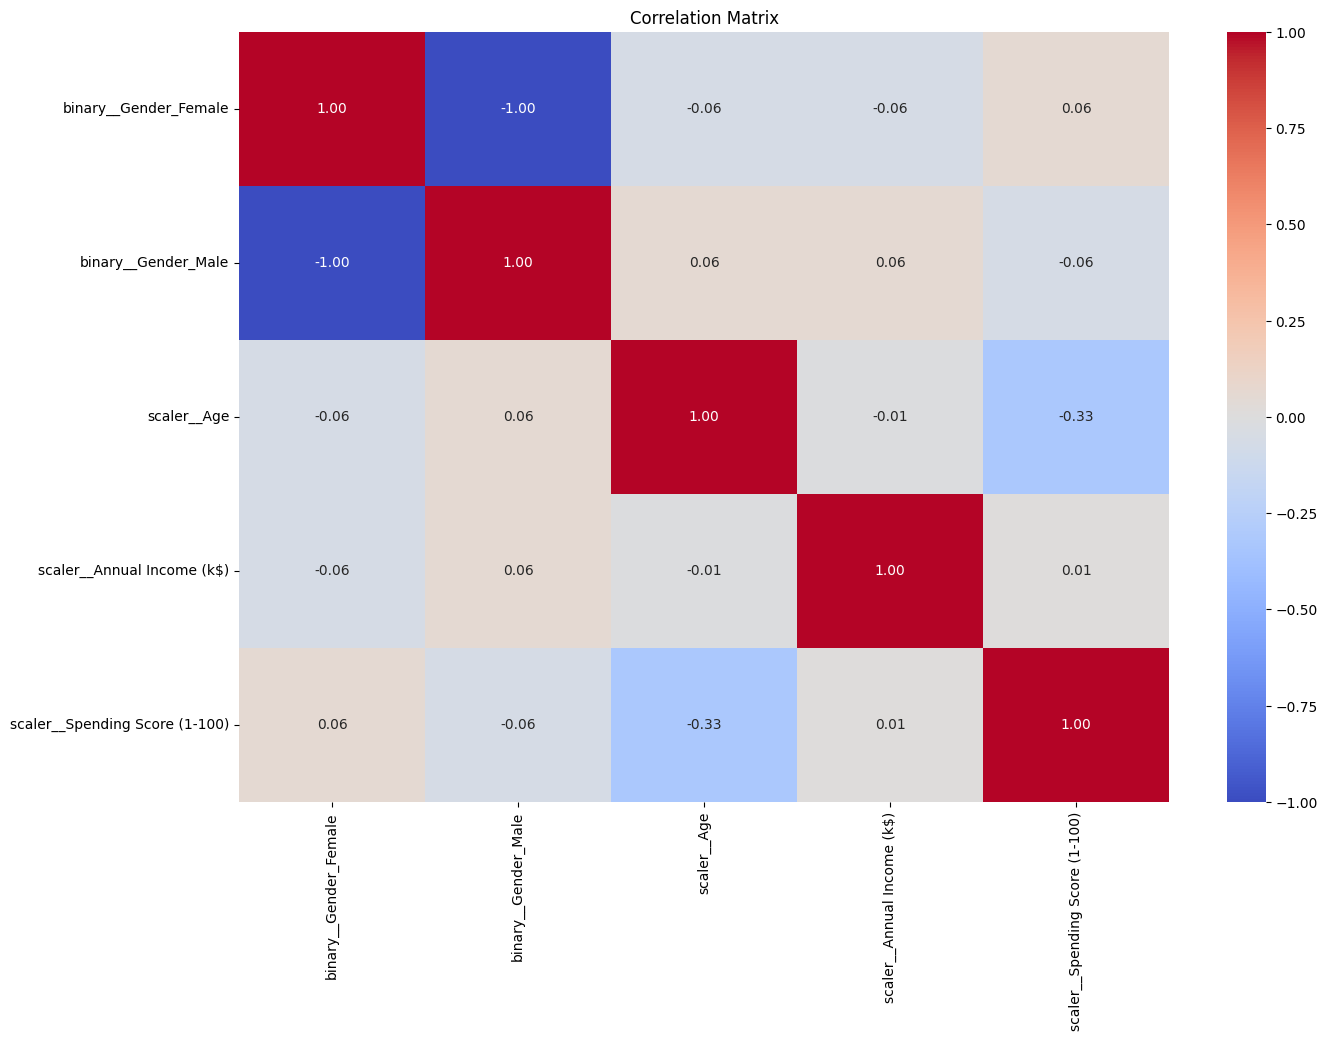

In [120]:
corr = df1_transformed.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f",
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Matrix')
plt.show()

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
preprocess_pipe = Pipeline(steps=[
    ('col_transform',preprocessor),
    ('pca',PCA(n_components=3))
])

In [122]:
df_processed = preprocess_pipe.fit_transform(df)
print("Shape of original data:", df.shape)
print("Shape of processed data:", df_processed.shape)

Shape of original data: (200, 4)
Shape of processed data: (200, 3)


In [123]:
df_processed

array([[-0.57572361, -1.68487363, -1.31521   ],
       [-1.62359494, -1.72648138, -0.06014863],
       [ 0.27961435, -1.72531425, -2.18257447],
       [-1.51106396, -1.79620462, -0.08024178],
       [-0.09546842, -1.7073466 , -0.69068401],
       [-1.53580344, -1.75857647, -0.15825486],
       [ 1.03564413, -1.62747944, -1.42156959],
       [-1.97915918, -1.73817968,  0.38703911],
       [ 2.68028034, -1.42925712, -0.02136026],
       [-1.02454893, -1.66667214,  0.13789905],
       [ 2.53113695, -1.43655689,  0.43291767],
       [-1.51023184, -1.68802373,  1.13308129],
       [ 1.95025617, -1.52756054, -0.00766432],
       [-1.46644971, -1.64266722, -0.02886616],
       [ 1.03895218, -1.44106096, -1.11572954],
       [-1.52575968, -1.53280315, -0.06354215],
       [ 0.2377451 , -1.54415148, -0.62451172],
       [-1.27279373, -1.48390972, -0.5218777 ],
       [ 1.35574248, -1.3221625 ,  0.08492263],
       [-1.48886023, -1.53487932,  1.10627781],
       [ 0.32986561, -1.31519863, -0.612

In [124]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_processed)
    wcss.append(km.inertia_)

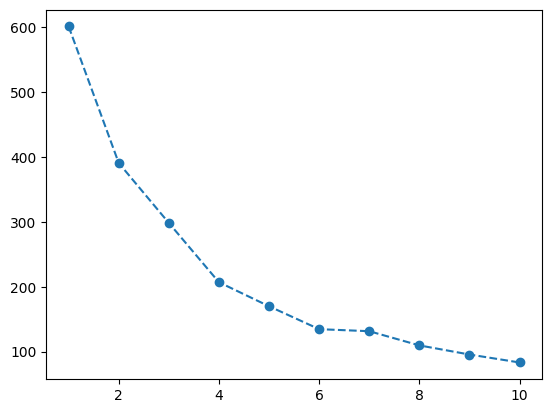

In [125]:
plt.plot(range(1,11),wcss,marker='o', linestyle='--')

In [126]:
km = KMeans(n_clusters=6)
y_means1 = km.fit_predict(df_processed)
y_means1

array([1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4, 1, 4, 1, 4, 2, 4, 1, 4,
       2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 1,
       2, 4, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 1, 3, 5, 3, 5, 3, 5, 3,
       1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 0, 5, 0, 5, 0,
       5, 0], dtype=int32)

In [127]:
df_processed[y_means1==1,0]

array([-0.57572361,  0.27961435, -0.09546842,  1.03564413,  1.03895218,
        0.2377451 ,  0.32986561,  0.58821397,  0.51062769, -0.70293582,
       -0.52381407, -0.28581637, -0.18461325, -0.48225327, -0.51741071,
       -0.64223069, -1.05986787, -1.22289874, -1.17229718, -0.28278087,
       -0.69027262,  0.18230274, -0.88397046, -0.11041279, -1.12196816,
       -1.02113925, -0.55221191, -0.74690335,  0.29558212, -0.1639482 ,
       -0.74573887, -0.63582734, -0.8675652 , -0.594997  , -0.72960615,
       -0.72355904, -1.15456598,  0.13367387, -0.8405805 , -1.0440077 ,
       -1.04812397, -0.71384763,  0.18390122, -0.27866462, -0.31724973,
       -0.33558584])

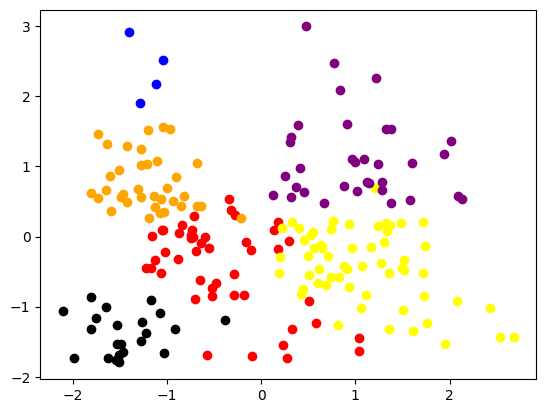

In [128]:
plt.scatter(df_processed[y_means1==0,0],df_processed[y_means1==0,1],color='blue')
plt.scatter(df_processed[y_means1==1,0],df_processed[y_means1==1,1],color='red')
plt.scatter(df_processed[y_means1==2,0],df_processed[y_means1==2,1],color='yellow')
plt.scatter(df_processed[y_means1==3,0],df_processed[y_means1==3,1],color='orange')
plt.scatter(df_processed[y_means1==4,0],df_processed[y_means1==4,1],color='black')
plt.scatter(df_processed[y_means1==5,0],df_processed[y_means1==5,1],color='purple')
# plt.scatter(df_processed[y_means1==6,0],df_processed[y_means1==6,1],color='brown')
# plt.scatter(df_processed[y_means1==7,0],df_processed[y_means1==7,1],color='grey')
# plt.scatter(df_processed[y_means1==8,0],df_processed[y_means1==8,1],color='pink')
# plt.scatter(df_processed[y_means1==9,0],df_processed[y_means1==9,1],color='violet')

In [129]:
silhouette = silhouette_score(df_processed, y_means1)
davies_bouldin = davies_bouldin_score(df_processed, y_means1)
calinski_harabasz = calinski_harabasz_score(df_processed, y_means1)
print(f'silhouette_score: {silhouette}')
print(f'davies_bouldin_score: {davies_bouldin}')
print(f'calinski_harabasz_score: {calinski_harabasz}')

silhouette_score: 0.3908695901846923
davies_bouldin_score: 0.8291169935752496
calinski_harabasz_score: 107.37139686334066


In [130]:
df1 = pd.DataFrame()
df1['col1'] = df_processed[:,0]
df1['col2'] = df_processed[:,1]
df1['col3'] = df_processed[:,2]
df1['label'] = y_means1

In [131]:
import plotly.express as px
fig = px.scatter_3d(x=df1['col1'],y=df1['col2'],z=df1['col3'],color=df1['label'])
fig.show()

Text(0, 0.5, 'Euclidean dist')

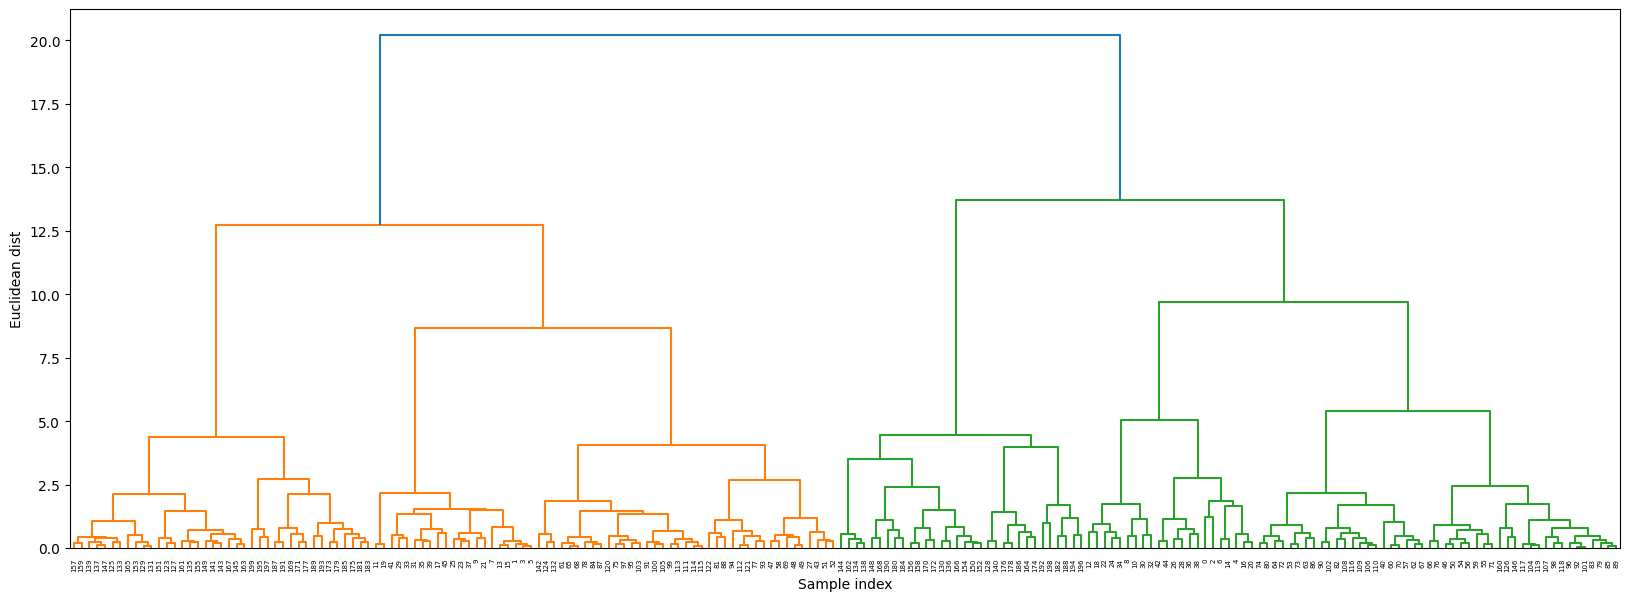

In [132]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(df_processed,method='ward'))
plt.xlabel('Sample index')
plt.ylabel('Euclidean dist')

In [133]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,linkage='ward')
cluster.fit(df_processed)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [134]:
y2 = cluster.labels_

In [135]:
silhouette = silhouette_score(df_processed, y2)
davies_bouldin = davies_bouldin_score(df_processed, y2)
calinski_harabasz = calinski_harabasz_score(df_processed, y2)
print(f'silhouette_score: {silhouette}')
print(f'davies_bouldin_score: {davies_bouldin}')
print(f'calinski_harabasz_score: {calinski_harabasz}')

silhouette_score: 0.3807297290929785
davies_bouldin_score: 0.9783052347221
calinski_harabasz_score: 111.63841760212155


In [136]:
# plt.scatter(df_processed[:,0],df_processed[:,1],df_processed[:,2],c=cluster.labels_)
df2 = pd.DataFrame()
df2['col1'] = df_processed[:,0]
df2['col2'] = df_processed[:,1]
df2['col3'] = df_processed[:,2]
df2['label1'] = y2

In [137]:
import plotly.express as px
fig = px.scatter_3d(x=df2['col1'],y=df2['col2'],z=df2['col3'],color=df2['label1'])
fig.show()

In [138]:
from sklearn.neighbors import NearestNeighbors

# Set k (n_neighbors). A good rule of thumb is 2 * number_of_features
# We have 2 features, so k=4.
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_processed)

# Find the k-neighbors for each point
distances, indices = neighbors_fit.kneighbors(df_processed)

# Sort the distances to the 4th neighbor (the last column)
distances = np.sort(distances[:, -1])

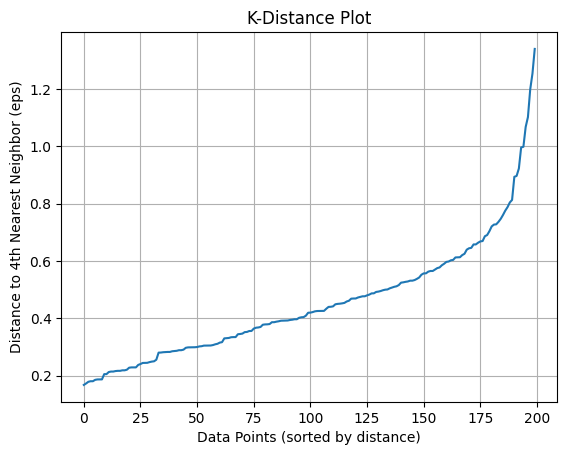

In [139]:
plt.plot(distances)
plt.title("K-Distance Plot")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel("Distance to 4th Nearest Neighbor (eps)")
plt.grid(True)

In [140]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.7,min_samples=15)
db.fit(df_processed)
y3 = db.labels_
y3

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0,  1, -1,  1,  2,  1,  0,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2,  2,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2,  1,  1,  3,  2,  3,  1,  3, -1,  3, -1,  3,  2,  3, -1,  3,
       -1,  3, -1,  3, -1,  3,  2,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [141]:
silhouette = silhouette_score(df_processed, y3)
davies_bouldin = davies_bouldin_score(df_processed, y3)
calinski_harabasz = calinski_harabasz_score(df_processed, y3)
print(f'silhouette_score: {silhouette}')
print(f'davies_bouldin_score: {davies_bouldin}')
print(f'calinski_harabasz_score: {calinski_harabasz}')

silhouette_score: 0.2767310161581263
davies_bouldin_score: 1.508675739589398
calinski_harabasz_score: 47.240766292757954


In [142]:
df3 = pd.DataFrame()
df3['col1'] = df_processed[:,0]
df3['col2'] = df_processed[:,1]
df3['col3'] = df_processed[:,2]
df3['label2'] = y3

In [143]:
fig = px.scatter_3d(x=df3['col1'],y=df3['col2'],z=df3['col3'],color=df3['label2'])
fig.show()